In [1]:
import pandas as pd
import numpy as np
import glob
import datetime as dt
import matplotlib.pyplot as plt

# EDA

In [2]:
orders = pd.read_csv('/Users/darigazaikenova/PycharmProjects/my projects/archive/olist_orders_dataset.csv')
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [3]:
#formatting the date
list1 = ['order_purchase_timestamp','order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
for f in list1:
    orders[f] = pd.to_datetime(orders[f], format ='%Y-%m-%d').dt.date

In [4]:
payment = pd.read_csv('/Users/darigazaikenova/PycharmProjects/my projects/archive/olist_order_payments_dataset.csv')
payment

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [5]:
df = pd.merge(orders,payment)
df = df.drop(['order_estimated_delivery_date', 'order_delivered_customer_date', 'order_delivered_carrier_date', 'order_approved_at', 'order_status','payment_type','payment_sequential'], axis=1)
df['total_payment'] = df['payment_installments'] * df['payment_value']
#assumed that if there was 3 installments and payment valus is 179.12, then customer paid 179.12 three times
df

,order_id,customer_id,order_purchase_timestamp,payment_installments,payment_value,total_payment
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02,1,18.12,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02,1,2.00,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02,1,18.59,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,2018-07-24,1,141.46,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,2018-08-08,3,179.12,537.36
...,...,...,...,...,...,...
103881,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,2017-03-09,3,85.08,255.24
103882,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,2018-02-06,3,195.00,585.00
103883,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,2017-08-27,5,271.01,1355.05
103884,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,2018-01-08,4,441.16,1764.64


# RFM

In [6]:
df_recency = df.groupby('customer_id', as_index=False)['order_purchase_timestamp'].max()
df_recency.rename(columns={ 'order_purchase_timestamp':'last_purchase_date'},inplace=True)
today = dt.date.today()
df_recency['recency'] = today - df_recency['last_purchase_date']
df_recency

,customer_id,last_purchase_date,recency
0,00012a2ce6f8dcda20d059ce98491703,2017-11-14,1760 days
1,000161a058600d5901f007fab4c27140,2017-07-16,1881 days
2,0001fd6190edaaf884bcaf3d49edf079,2017-02-28,2019 days
3,0002414f95344307404f0ace7a26f1d5,2017-08-16,1850 days
4,000379cdec625522490c315e70c7a9fb,2018-04-02,1621 days
...,...,...,...
99435,fffecc9f79fd8c764f843e9951b11341,2018-03-29,1625 days
99436,fffeda5b6d849fbd39689bb92087f431,2018-05-22,1571 days
99437,ffff42319e9b2d713724ae527742af25,2018-06-13,1549 days
99438,ffffa3172527f765de70084a7e53aae8,2017-09-02,1833 days


In [7]:
df_frequency = df.groupby('customer_id', as_index=False)['order_id'].nunique()
df_frequency.rename(columns={'order_id':'frequency'},inplace=True)
df_frequency

,customer_id,frequency
0,00012a2ce6f8dcda20d059ce98491703,1
1,000161a058600d5901f007fab4c27140,1
2,0001fd6190edaaf884bcaf3d49edf079,1
3,0002414f95344307404f0ace7a26f1d5,1
4,000379cdec625522490c315e70c7a9fb,1
...,...,...
99435,fffecc9f79fd8c764f843e9951b11341,1
99436,fffeda5b6d849fbd39689bb92087f431,1
99437,ffff42319e9b2d713724ae527742af25,1
99438,ffffa3172527f765de70084a7e53aae8,1


In [8]:
df_monetary = df.groupby('customer_id', as_index=False)['total_payment'].sum()
df_monetary.rename(columns={'total_payment':'monetary'},inplace=True)
df_monetary

,customer_id,monetary
0,00012a2ce6f8dcda20d059ce98491703,917.92
1,000161a058600d5901f007fab4c27140,337.05
2,0001fd6190edaaf884bcaf3d49edf079,1954.20
3,0002414f95344307404f0ace7a26f1d5,179.35
4,000379cdec625522490c315e70c7a9fb,107.01
...,...,...
99435,fffecc9f79fd8c764f843e9951b11341,81.36
99436,fffeda5b6d849fbd39689bb92087f431,189.39
99437,ffff42319e9b2d713724ae527742af25,428.26
99438,ffffa3172527f765de70084a7e53aae8,182.00


In [9]:
rf = pd.merge(df_recency, df_frequency)
rfm = pd.merge(rf, df_monetary).drop('last_purchase_date', axis=1)
rfm.set_index('customer_id', inplace=True)
rfm

,recency,frequency,monetary
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,1760 days,1,917.92
000161a058600d5901f007fab4c27140,1881 days,1,337.05
0001fd6190edaaf884bcaf3d49edf079,2019 days,1,1954.20
0002414f95344307404f0ace7a26f1d5,1850 days,1,179.35
000379cdec625522490c315e70c7a9fb,1621 days,1,107.01
...,...,...,...
fffecc9f79fd8c764f843e9951b11341,1625 days,1,81.36
fffeda5b6d849fbd39689bb92087f431,1571 days,1,189.39
ffff42319e9b2d713724ae527742af25,1549 days,1,428.26


In [10]:
rfm['r_rank'] = rfm['recency'].rank(ascending=False) #the smaller the better
rfm['f_rank'] = rfm['frequency'].rank(ascending=True)
rfm['m_rank'] = rfm['monetary'].rank(ascending=True)

rfm['r_percentile'] = (rfm['r_rank']/rfm['r_rank'].max())*100
rfm['f_percentile'] = (rfm['f_rank']/rfm['f_rank'].max())*100
rfm['m_percentile'] = (rfm['m_rank']/rfm['m_rank'].max())*100

rfm['r_score'] = pd.qcut(rfm["r_percentile"],5,labels=[1,2,3,4,5]).astype(int)
try:
    rfm['f_score'] = pd.qcut(rfm["f_percentile"],5,labels=[1,2,3,4,5]).astype(int)
except ValueError:
    rfm['f_score'] = 5
    rfm['f_score'].astype(int)
rfm['m_score'] = pd.qcut(rfm["m_percentile"],5,labels=[1,2,3,4,5]).astype(int)

rfm.drop(columns=['r_rank', 'f_rank', 'm_rank', 'r_percentile', 'f_percentile', 'm_percentile'], inplace=True)
rfm['rfm_score'] = rfm['r_score'].astype(str) +rfm['f_score'].astype(str) + rfm['m_score'].astype(str)
rfm['rfm_score']=rfm['rfm_score'].astype(int)
rfm

,recency,frequency,monetary,r_score,f_score,m_score,rfm_score
customer_id,,,,,,,
00012a2ce6f8dcda20d059ce98491703,1760 days,1,917.92,2,5,5,255
000161a058600d5901f007fab4c27140,1881 days,1,337.05,1,5,4,154
0001fd6190edaaf884bcaf3d49edf079,2019 days,1,1954.20,1,5,5,155
0002414f95344307404f0ace7a26f1d5,1850 days,1,179.35,2,5,3,253
000379cdec625522490c315e70c7a9fb,1621 days,1,107.01,4,5,2,452
...,...,...,...,...,...,...,...
fffecc9f79fd8c764f843e9951b11341,1625 days,1,81.36,4,5,2,452
fffeda5b6d849fbd39689bb92087f431,1571 days,1,189.39,4,5,3,453
ffff42319e9b2d713724ae527742af25,1549 days,1,428.26,5,5,4,554


In [11]:
rfm["customer_segment"] = np.where(rfm['rfm_score'] > 500, "Best Customer",
                                   (np.where(rfm['rfm_score'] > 400, "High value Customer",
                                    (np.where(rfm['rfm_score'] > 300, "Medium Value Customer",
                                    (np.where(rfm['rfm_score'] > 160,'Low Value Customers', 'Lost Customer')))))))
rfm[['rfm_score','customer_segment']]

,rfm_score,customer_segment
customer_id,,
00012a2ce6f8dcda20d059ce98491703,255,Low Value Customers
000161a058600d5901f007fab4c27140,154,Lost Customer
0001fd6190edaaf884bcaf3d49edf079,155,Lost Customer
0002414f95344307404f0ace7a26f1d5,253,Low Value Customers
000379cdec625522490c315e70c7a9fb,452,High value Customer
...,...,...
fffecc9f79fd8c764f843e9951b11341,452,High value Customer
fffeda5b6d849fbd39689bb92087f431,453,High value Customer
ffff42319e9b2d713724ae527742af25,554,Best Customer


# Average rfm scores

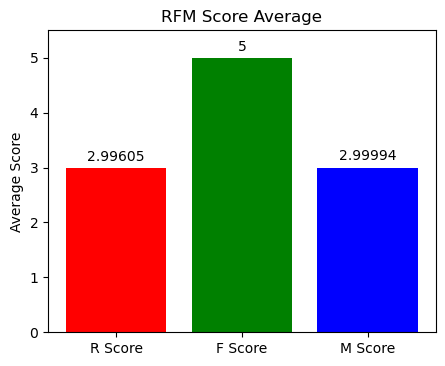

In [12]:
list1 = ['r_score', 'f_score', 'm_score']
avg = []
for i in list1:
    avg_i = rfm[i].mean()
    avg.append(avg_i)

values = avg
colors = ['r', 'g', 'b']

def rounding(values):
    values_rounded = []
    for value in values:
        rounded = round(value, 5)
        values_rounded.append(rounded)
    return values_rounded
values_rounded = rounding(values)


fig, ax = plt.subplots(figsize=(5,4), dpi=100)
plt.bar(range(0,len(values_rounded)), values_rounded, color=colors)
plt.xticks(range(0,len(values_rounded)), ('R Score', 'F Score', 'M Score'))
plt.ylabel("Average Score")
plt.title('RFM Score Average')
plt.bar_label(ax.containers[0], label_type='edge', padding=3)
plt.margins(y=0.10)

# Result

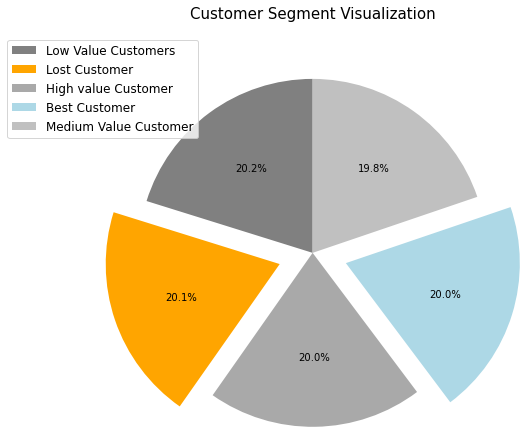

In [13]:
values  = rfm.customer_segment.value_counts()
colors  = ['grey', 'orange', 'darkgrey', 'lightblue', 'silver']
explode = [0, 0.4, 0, 0.4, 0]  

plt.pie(values, colors= colors, explode = explode, autopct='%.1f%%', startangle=90, radius = 2)

plt.legend(
    loc='lower right',
    labels = rfm.customer_segment.value_counts().index,
    prop={'size': 12},
    bbox_to_anchor=(0.0,1))

plt.title('Customer Segment Visualization', fontsize=15, y=1.55)
plt.show()

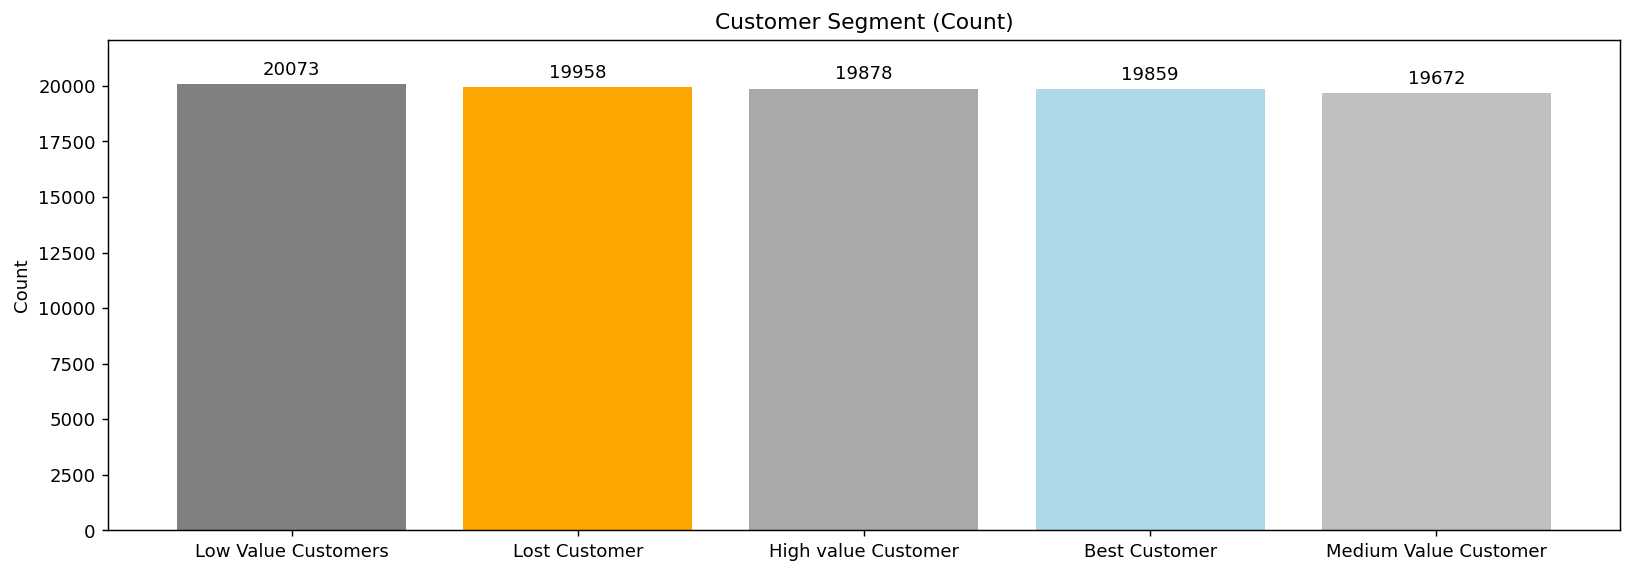

In [14]:
values = rfm.customer_segment.value_counts()
colors = ['grey', 'orange', 'darkgrey', 'lightblue', 'silver']

fig, ax = plt.subplots(figsize=(15,5), dpi=130)
plt.bar(range(0,len(values)), values, color=colors)
plt.xticks(range(0,len(values)), (rfm.customer_segment.value_counts().index))
plt.ylabel("Count")
plt.title('Customer Segment (Count)')
plt.bar_label(ax.containers[0], label_type='edge', padding=3)
plt.margins(y=0.10)

